In [30]:
%matplotlib inline

In [31]:
# Add the Pandas dependency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# File to load
ny_data_to_load = "NY_state.csv"

In [33]:
# Read the NY plant data and store it in a Pandas DataFrame
ny_data_df = pd.read_csv(ny_data_to_load)
# ny_data_df.head()

In [34]:
# Determine the amount of missing data in NY plant data.
# Missing data is expected in the Synonym Symbol and National Common Name columns.
ny_data_df.notnull().sum()

Symbol                         16351
Synonym Symbol                 10182
Scientific Name with Author    16351
National Common Name            6160
Family                         16351
dtype: int64

In [35]:
# Confirm that the data type is object for the DataFrame.
ny_data_df.dtypes

Symbol                         object
Synonym Symbol                 object
Scientific Name with Author    object
National Common Name           object
Family                         object
dtype: object

In [36]:
# Get the total rows of data.
plant_count = ny_data_df['Symbol'].count()
plant_count

16351

## TOP 10 COMMON PLANT FAMILY ANAlYSIS

In [37]:
# Get the total numbers for Family.
family_count = len(ny_data_df["Family"].unique())
# family_count

In [38]:
# Double checked from https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups
# Get the count for each Family represented.
family_data = ny_data_df.Family.value_counts()
# family_data.head()

Text(0.5, 0, 'Family Name')

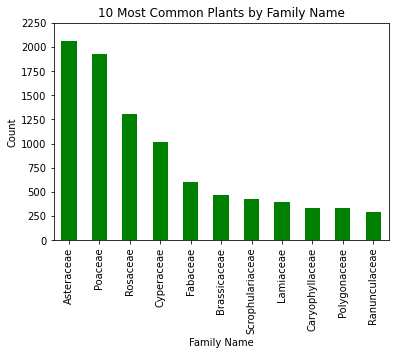

In [39]:
# Create a bar graph of top 10
family_data.plot.bar(x = "Family", y = "Count", 
                    color="green")
# Add chart elements
plt.title("10 Most Common Plants by Family Name")
plt.xlim(-0.5, 10.5)
plt.ylim(0, 2250)
plt.ylabel("Count")
plt.xlabel("Family Name")

In [40]:
# Get the percent each Family represents from total Plants
family_percentage = family_data/float(plant_count)*100
# family_percentage.head(10)

Text(0.5, 0, 'Family Name')

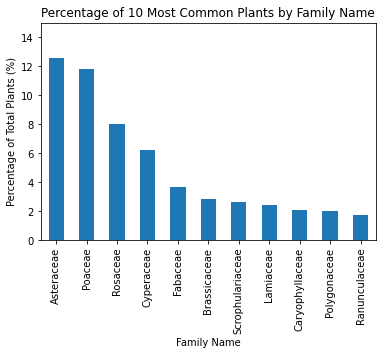

In [41]:
# Create a pie chart of top 10
family_percentage.plot.bar(x = "Family", y = "Percentage")
# Add chart elements
plt.title("Percentage of 10 Most Common Plants by Family Name")
plt.xlim(-0.5, 10.5)
plt.ylim(0, 15)
plt.ylabel("Percentage of Total Plants (%)")
plt.xlabel("Family Name")

In [42]:
# Get the Family information into a new DataFrame.
family_df = pd.DataFrame({"Count": family_data,
                         "Percentage of Plants": family_percentage})
# Format the Total School Budget and the Per Student Budget columns.
family_df["Percentage of Plants"] = family_df["Percentage of Plants"].map("{:,.2f}%".format)

family_df.head(10)

,Count,Percentage of Plants
Asteraceae,2057,12.58%
Poaceae,1927,11.79%
Rosaceae,1305,7.98%
Cyperaceae,1016,6.21%
Fabaceae,604,3.69%
Brassicaceae,468,2.86%
Scrophulariaceae,430,2.63%
Lamiaceae,399,2.44%
Caryophyllaceae,338,2.07%
Polygonaceae,331,2.02%


# # TOP 10 COMMON PLANT SPECIES

In [43]:
# Put the scientific names in a list.
scientific_names = ny_data_df["Scientific Name with Author"].tolist()
# Split the species name and determine the length of the split name.
for name in scientific_names:
    name.split(),len(name.split())

In [52]:
# Get only the species name to a new list.
species_name=[]
for name in scientific_names:
        species_name.append(name.split()[:2])
# Add species name to the NY data DataFrame
ny_data_df["Species Name"] = species_name

In [53]:
ny_data_df

,Symbol,Synonym Symbol,Scientific Name with Author,National Common Name,Family,Species Name
0,JUAM,NaN,Justicia americana (L.) Vahl,American water-willow,Acanthaceae,"[Justicia, americana]"
1,JUAM,DIAM2,Dianthera americana L.,NaN,Acanthaceae,"[Dianthera, americana]"
2,JUAM,DIAMS,Dianthera americana L. var. subcoriacea (Ferna...,NaN,Acanthaceae,"[Dianthera, americana]"
3,JUAM,JUAMS,Justicia americana (L.) Vahl var. subcoriacea ...,NaN,Acanthaceae,"[Justicia, americana]"
4,JUAM,JUMO2,Justicia mortuifluminis Fernald,NaN,Acanthaceae,"[Justicia, mortuifluminis]"
...,...,...,...,...,...,...
16346,TRIBU,NaN,Tribulus L.,puncturevine,Zygophyllaceae,"[Tribulus, L.]"
16347,TRTE,NaN,Tribulus terrestris L.,puncturevine,Zygophyllaceae,"[Tribulus, terrestris]"
16348,ZYFA,NaN,Zygophyllum fabago L.,Syrian beancaper,Zygophyllaceae,"[Zygophyllum, fabago]"
16349,ZYFA,ZYFAB,Zygophyllum fabago L. var. brachycarpum auct. ...,NaN,Zygophyllaceae,"[Zygophyllum, fabago]"


In [48]:
# Get the count of the unique of plant species.
species_count = len(ny_data_df['Species Name'].unique())

TypeError: unhashable type: 'list'